In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")

In [6]:
train_data.drop(columns = ["Unnamed: 0"], inplace = True)

In [7]:
train_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.01,Very Good,E,SI2,60.0,60.0,4540,6.57,6.49,3.92
1,1.10,Premium,H,VS2,62.5,58.0,5729,6.59,6.54,4.10
2,1.50,Good,E,SI2,61.5,65.0,6300,7.21,7.17,4.42
3,1.53,Premium,E,SI1,61.3,59.0,12968,7.40,7.35,4.52
4,0.84,Fair,D,SI2,64.5,60.0,2167,5.92,5.84,3.79
...,...,...,...,...,...,...,...,...,...,...
43149,1.05,Very Good,I,VS2,62.4,59.0,4975,6.48,6.51,4.05
43150,0.47,Ideal,D,VS1,61.0,55.0,1617,5.03,5.01,3.06
43151,0.33,Very Good,F,IF,60.3,58.0,1014,4.49,4.46,2.70
43152,0.90,Premium,J,SI1,62.8,59.0,2871,6.13,6.03,3.82


In [9]:
train_data.describe()

,carat,depth,table,price,x,y,z
count,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000
mean,0.799047,61.742925,57.459010,3946.777054,5.733798,5.737574,3.539338
std,0.475214,1.428410,2.227191,3998.657385,1.123004,1.150325,0.696203
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,953.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2406.500000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5367.000000,6.540000,6.540000,4.040000
max,4.500000,79.000000,79.000000,18823.000000,10.230000,58.900000,8.060000


In [5]:
train_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.01,Very Good,E,SI2,60.0,60.0,4540,6.57,6.49,3.92
1,1.10,Premium,H,VS2,62.5,58.0,5729,6.59,6.54,4.10
2,1.50,Good,E,SI2,61.5,65.0,6300,7.21,7.17,4.42
3,1.53,Premium,E,SI1,61.3,59.0,12968,7.40,7.35,4.52
4,0.84,Fair,D,SI2,64.5,60.0,2167,5.92,5.84,3.79
...,...,...,...,...,...,...,...,...,...,...
43149,1.05,Very Good,I,VS2,62.4,59.0,4975,6.48,6.51,4.05
43150,0.47,Ideal,D,VS1,61.0,55.0,1617,5.03,5.01,3.06
43151,0.33,Very Good,F,IF,60.3,58.0,1014,4.49,4.46,2.70
43152,0.90,Premium,J,SI1,62.8,59.0,2871,6.13,6.03,3.82


## Data Explorations

In [7]:
train_data["cut"].value_counts()

Ideal        17235
Premium      11059
Very Good     9672
Good          3906
Fair          1282
Name: cut, dtype: int64

In [8]:
train_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

<AxesSubplot:>

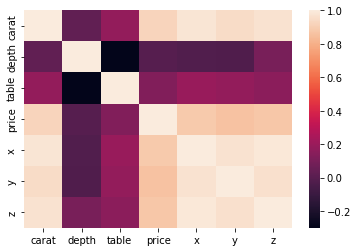

In [9]:
cols = ['carat', 'depth', 'table', 'price', 'x', 'y','z']
sns.heatmap(train_data[cols].corr())

In [12]:
train_data_modified = train_data[['carat', 'price', 'cut', 'color', 'clarity', 'depth', 'table']]
train_data_modified['volume'] = train_data['x'] * train_data['y'] * train_data['z']

C:\Users\tongf\AppData\Local\Temp/ipykernel_17984/1219376447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_modified['volume'] = train_data['x'] * train_data['y'] * train_data['z']


In [13]:
train_data_modified

,carat,price,cut,color,clarity,depth,table,volume
0,1.01,4540,Very Good,E,SI2,60.0,60.0,167.146056
1,1.10,5729,Premium,H,VS2,62.5,58.0,176.704260
2,1.50,6300,Good,E,SI2,61.5,65.0,228.494994
3,1.53,12968,Premium,E,SI1,61.3,59.0,245.842800
4,0.84,2167,Fair,D,SI2,64.5,60.0,131.030912
...,...,...,...,...,...,...,...,...
43149,1.05,4975,Very Good,I,VS2,62.4,59.0,170.848440
43150,0.47,1617,Ideal,D,VS1,61.0,55.0,77.112918
43151,0.33,1014,Very Good,F,IF,60.3,58.0,54.068580
43152,0.90,2871,Premium,J,SI1,62.8,59.0,141.202098


In [10]:
from autogluon.tabular import FeatureMetadata
feature_metadata = FeatureMetadata.from_df(train_data)

print(feature_metadata)

('float', [])  : 6 | ['carat', 'depth', 'table', 'x', 'y', ...]
('int', [])    : 1 | ['price']
('object', []) : 3 | ['cut', 'color', 'clarity']


In [15]:
label = "price"
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label=label, eval_metric = 'root_mean_squared_error').fit(train_data=train_data_modified, 
                                                                                       presets = 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20221116_000219\"
Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221116_000219\"
AutoGluon Version:  0.4.2
Python Version:     3.9.7
Operating System:   Windows
Train Data Rows:    43154
Train Data Columns: 7
Label Column: price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (18823, 326, 3946.77705, 3998.65738)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1111.25 MB
	Train Data (Original)  Memory Usage: 9.21 MB (0.8% 

Fitting model: LightGBM_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-3811.1029	 = Validation score   (root_mean_squared_error)
	1.73s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	Not enough memory to train RandomForestMSE_BAG_L1... Skipping this model.
Fitting model: CatBoost_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
		ray::_ray_fit() (pid=11840, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 596, in ray._raylet.execute_task
  File "C:\Users\tongf\anaconda3\lib\site-packages\ray\_private\memory_monitor.py", line 156, in raise_if_low_memory
    raise RayOutOfMemoryError(
ray._private.memory_monitor.RayOutOfMemoryError: More than 95% of the memory on node TONGFEI is used (7.54 / 7.86 GB). The top 10 memory consumers are:

PID	MEM	COMMAND
17984	0.34GiB	C:/Users/tongf/anaconda3\python.exe -m ipykernel_launcher -f C:\Users\tongf\A

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-518.0554	 = Validation score   (root_mean_squared_error)
	113.71s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ...
	-515.2534	 = Validation score   (root_mean_squared_error)
	2.63s	 = Training   runtime
	1.26s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L2 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-520.0013	 = Validation score   (root_mean_squared_error)
	80.91s	 = Training   runtime
	0.91s	 = Validation runtime
Fitting model: XGBoost_BAG_L2 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-517.4958	 = Validation score   (root_mean_squared_error)
	8.59s	 = Training   runtime
	0.38s	 = Validation runtime
Fitting model: NeuralNetTorch_BAG_L2 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-545.37	 = Validation score

In [20]:
# predictor = TabularPredictor.load("AutogluonModels/ag-20221116_000219\")

In [19]:
predictor.get_model_best()

'WeightedEnsemble_L3'

In [20]:
predictor.leaderboard(extra_info=True, silent=True)

C:\Users\tongf\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,num_features,...,child_model_type,hyperparameters,hyperparameters_fit,ag_args_fit,features,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-510.256301,10.678264,596.671694,0.001001,1.159750,3,True,19,7,...,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'drop_unique': False}","[ExtraTreesMSE_BAG_L2, LightGBM_BAG_L2, XGBoost_BAG_L2, CatBoost_BAG_L2, NeuralNetFastAI_BAG_L2, NeuralNetTorch_BAG_L2, RandomForestMSE_BAG_L2]",{'ensemble_size': 100},{'ensemble_size': 82},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'drop_unique': False}","[KNeighborsUnif_BAG_L1, KNeighborsDist_BAG_L1, ExtraTreesMSE_BAG_L2, NeuralNetTorch_BAG_L1, LightGBMLarge_BAG_L1, LightGBM_BAG_L2, NeuralNetTorch_BAG_L2, RandomForestMSE_BAG_L2, LightGBM_BAG_L1, NeuralNetFastAI_BAG_L1, XGBoost_BAG_L1, ExtraTreesMSE_BAG_L1, XGBoost_BAG_L2, CatBoost_BAG_L2, NeuralNetFastAI_BAG_L2]",[]
1,ExtraTreesMSE_BAG_L2,-515.253375,7.122450,277.680735,1.260286,2.628597,2,True,14,15,...,XTModel,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True, 'use_child_oof': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'drop_unique': False}","[LightGBM_BAG_L1, NeuralNetFastAI_BAG_L1, depth, carat, KNeighborsUnif_BAG_L1, volume, KNeighborsDist_BAG_L1, XGBoost_BAG_L1, NeuralNetTorch_BAG_L1, ExtraTreesMSE_BAG_L1, LightGBMLarge_BAG_L1, cut, clarity, table, color]","{'n_estimators': 300, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'criterion': 'squared_error'}",{'n_estimators': 244},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None}","[LightGBM_BAG_L1, NeuralNetFastAI_BAG_L1, KNeighborsUnif_BAG_L1, KNeighborsDist_BAG_L1, XGBoost_BAG_L1, NeuralNetTorch_BAG_L1, ExtraTreesMSE_BAG_L1, LightGBMLarge_BAG_L1]",[WeightedEnsemble_L3]
2,WeightedEnsemble_L2,-515.617672,4.777925,104.508508,0.002002,0.420096,2,True,9,4,...,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'drop_unique': False}","[NeuralNetFastAI_BAG_L1, XGBoost_BAG_L1, LightGBMLarge_BAG_L1, ExtraTreesMSE_BAG_L1]",{'ensemble_size': 100},{'ensemble_size': 79},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_

In [21]:
predictor.feature_importance(train_data_modified)

Computing feature importance via permutation shuffling for 7 features using 5000 rows with 5 shuffle sets...
	185.91s	= Expected runtime (37.18s per shuffle set)
	115.3s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
carat,4432.846946,125.077388,7.598093e-08,5,4690.383016,4175.310877
clarity,1299.919249,10.756624,5.625744e-10,5,1322.067286,1277.771212
volume,1275.299370,40.490970,1.217817e-07,5,1358.670837,1191.927904
color,980.411898,45.416135,5.509930e-07,5,1073.924348,886.899448
depth,134.081770,5.982062,4.741919e-07,5,146.398918,121.764622
cut,100.177939,5.459180,1.054107e-06,5,111.418466,88.937412
table,93.711181,4.770593,8.031667e-07,5,103.533897,83.888465


In [16]:
test_data = pd.read_csv("test.csv")

In [17]:
test_data.drop(columns = ["id"], inplace = True)

In [18]:
test_data

,carat,cut,color,clarity,depth,table,x,y,z
0,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47
1,1.21,Very Good,F,VS2,62.9,54.0,6.78,6.82,4.28
2,0.50,Fair,E,SI1,61.7,68.0,5.09,5.03,3.12
3,0.50,Ideal,D,SI2,62.8,56.0,5.06,5.03,3.17
4,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61
...,...,...,...,...,...,...,...,...,...
10784,0.53,Ideal,F,VS2,62.3,55.0,5.20,5.17,3.23
10785,0.41,Premium,G,SI1,61.3,60.0,4.75,4.81,2.93
10786,0.51,Premium,G,VS2,62.4,58.0,5.11,5.12,3.19
10787,1.08,Good,J,SI2,63.2,59.0,6.40,6.57,4.10


In [22]:
test_data_modified = test_data[['carat', 'cut', 'color', 'clarity', 'depth', 'table']]
test_data_modified['volume'] = test_data['x'] * test_data['y'] * test_data['z']

SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [23]:
y_pred = predictor.predict(test_data_modified)

In [24]:
y_pred

0          562.043701
1         8498.640625
2         1245.644531
3         1201.638428
4        10109.661133
             ...     
10784     1657.003784
10785      797.090210
10786     1514.231445
10787     3667.767822
10788      848.197388
Name: price, Length: 10789, dtype: float32

In [25]:
d = {"price": pd.Series(y_pred)}
submission = pd.DataFrame(data = d, index = test_data.index)

In [26]:
submission.index.name = "id"

In [27]:
submission.to_csv("submission.csv")